In [1]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [4]:
databse_name = "fehring_growing_nn"
table_name = "incumbent_gen_2_layers"

In [5]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-18 10:44:56,773  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 10:44:56,773  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 10:44:56,773  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 10:44:56,774  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 10:44:56,774  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 10:44:56,774  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 10:44:56,774  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 10:44:56,774  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 10:44:56,775  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 10:44:56,775  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-18 10:44:56,845  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-18 10:44:56,991  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-18 10:44:57,070  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-18 10:44:57,070  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-18 10:44:57,071  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-18 10:44:57,071  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-18 10:44:57,071  | py-experimenter - INFO     | Closing all open connections...
2024-07-18 10:44:57,071  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [6]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 1]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] - 1
minimal_cost = grow_once_minimal_cost_row["cost"]

In [8]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-18 10:45:10,549  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 10:45:10,550  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 10:45:10,551  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 10:45:10,551  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 10:45:10,551  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 10:45:10,551  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 10:45:10,552  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 10:45:10,552  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 10:45:10,552  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 10:45:10,552  | py-experimenter - WARNING  | No values given for keyfield total_time

In [9]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
4800,9101,2,2024-07-18 01:07:32,2,48,None,50000,-1.552,0.776541
4801,9102,2,2024-07-18 01:07:32,2,48,None,100000,-0.956,0.956684
4802,9103,2,2024-07-18 01:07:32,2,48,None,150000,-0.279,0.861724
4803,9104,2,2024-07-18 01:07:32,2,48,None,200000,-1.167,0.953332
4804,9105,2,2024-07-18 01:07:32,2,48,None,250000,-0.880,1.116620
...,...,...,...,...,...,...,...,...,...
4895,9196,2,2024-07-18 01:13:11,1,48,None,800000,1.000,0.000000
4896,9197,2,2024-07-18 01:13:12,1,48,None,850000,1.000,0.000000
4897,9198,2,2024-07-18 01:13:12,1,48,None,900000,1.000,0.000000
4898,9199,2,2024-07-18 01:13:12,1,48,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

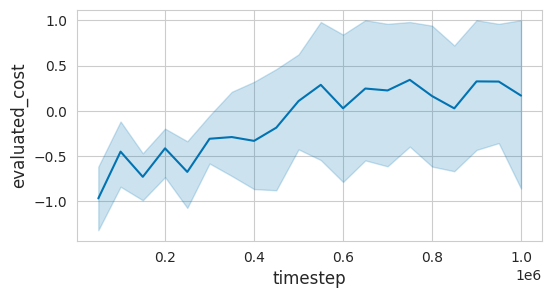

In [7]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

# Add Grow Once Data

In [8]:
table_name = "net2deeper_grow_once"

In [9]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 4]


2024-07-18 10:02:59,096  | py-experimenter - WARNING  | No values given for keyfield environment_id


2024-07-18 10:02:59,097  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 10:02:59,097  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 10:02:59,097  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 10:02:59,097  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 10:02:59,098  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 10:02:59,098  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 10:02:59,098  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 10:02:59,098  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 10:02:59,098  | py-experimenter - WARNING  | No values given for keyfield total_timesteps
2024-07-18 10:02:59,099  | py-experimenter - WARNING  | No values given for keyfield smac_budg

In [10]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"] -1 
minimal_cost = grow_once_minimal_cost_row["cost"]


In [11]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-18 10:02:59,607  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 10:02:59,607  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 10:02:59,607  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 10:02:59,608  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 10:02:59,608  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 10:02:59,608  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 10:02:59,608  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 10:02:59,608  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 10:02:59,609  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 10:02:59,609  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-18 10:02:59,681  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-18 10:02:59,828  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-18 10:02:59,951  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-18 10:02:59,951  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-18 10:02:59,952  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-18 10:02:59,952  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-18 10:02:59,952  | py-experimenter - INFO     | Closing all open connections...
2024-07-18 10:02:59,952  | py-experimenter - WARNING  | Tunnels are not started. Please .s

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

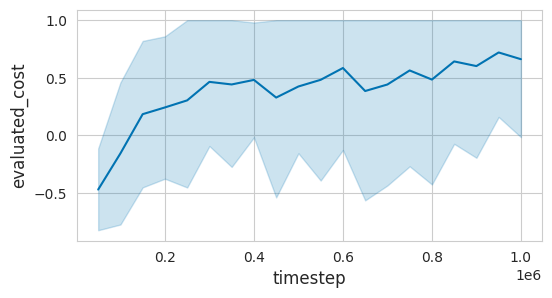

In [12]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

2024-07-18 10:03:00,326  | py.warnings - WARNING  | /tmp/ipykernel_424656/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-18 10:03:00,326  | py.warnings - WARNING  | /tmp/ipykernel_424656/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-18 10:03

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

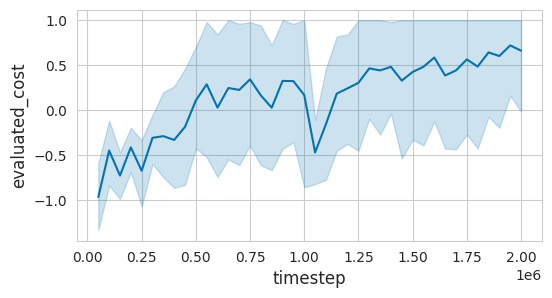

In [13]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()
combined_growed = pd.concat([relevat_training_process_before_growth, relevat_training_process_after_growth])
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost")

# Add Baseline

In [14]:
table_name = "hpo_warmstart"

In [15]:
warmstarting_table = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")
smac_cost_warmstarting = warmstarting_table[warmstarting_table["experiment_id"] == 5]

2024-07-18 10:03:00,641  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 10:03:00,642  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 10:03:00,642  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 10:03:00,642  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 10:03:00,643  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 10:03:00,643  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 10:03:00,644  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 10:03:00,644  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 10:03:00,644  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 10:03:00,645  | py-experimenter - WARNING  | No values given for keyfield total_time

In [16]:
samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"] -1
minimal_cost = samc_cost_warmstarting_row["cost"]

In [17]:
samc_cost_warmstarting_row

ID                                                                             115
experiment_id                                                                    5
timestamp                                                      2024-07-17 04:39:32
trial_number                                                                    49
budget                                                                        None
hyperparameter_str_identifier    {'batch_size': 32, 'ent_coef': 0.0005309372850...
cost                                                                       -0.5228
Name: 48, dtype: object

In [18]:
training_process_after_warmstarting = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo_1_layer/config/blackbox_only_hpo.yaml")

2024-07-18 10:03:01,173  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-18 10:03:01,173  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-18 10:03:01,174  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-18 10:03:01,174  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-18 10:03:01,174  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-18 10:03:01,174  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-18 10:03:01,174  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-18 10:03:01,175  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-18 10:03:01,175  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-18 10:03:01,175  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-18 10:03:01,246  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-18 10:03:01,392  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-18 10:03:01,469  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-18 10:03:01,469  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-18 10:03:01,469  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-18 10:03:01,470  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-18 10:03:01,470  | py-experimenter - INFO     | Closing all open connections...
2024-07-18 10:03:01,470  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [19]:
training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 5) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]

,ID,experiment_id,timestamp,worker_id,trial_number,budget,hyperparameter_str_identifier,timestep,evaluated_cost,evaluated_stdev
4800,11481,5,2024-07-17 04:31:37,3,48,1000000,None,50000,-1.563000e+00,0.782663
4801,11482,5,2024-07-17 04:31:37,3,48,1000000,None,100000,-3.860000e-01,0.772117
4802,11483,5,2024-07-17 04:31:37,3,48,1000000,None,150000,-3.820000e-01,0.764327
4803,11484,5,2024-07-17 04:31:37,3,48,1000000,None,200000,1.100000e-02,0.746384
4804,11485,5,2024-07-17 04:31:37,3,48,1000000,None,250000,-9.700000e-02,0.691868
...,...,...,...,...,...,...,...,...,...,...
4895,11576,5,2024-07-17 04:39:30,0,48,1000000,None,800000,-1.920000e-01,0.576000
4896,11577,5,2024-07-17 04:39:30,0,48,1000000,None,850000,-3.860000e-01,1.093590
4897,11578,5,2024-07-17 04:39:30,0,48,1000000,None,900000,8.940700e-09,1.095450
4898,11579,5,2024-07-17 04:39:30,0,48,1000000,None,950000,2.000000e-01,0.400000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

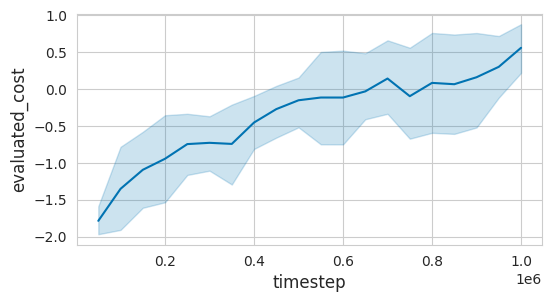

In [20]:
# Plot training process after warmstarting
training_process_after_warmstarting = training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == 5) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=training_process_after_warmstarting, x="timestep", y="evaluated_cost")

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

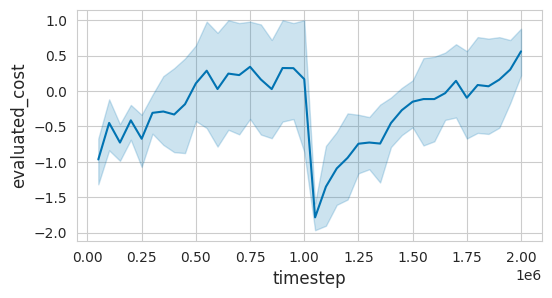

In [21]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
combined_warmstarted = pd.concat([relevat_training_process_before_growth, training_process_after_warmstarting])
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

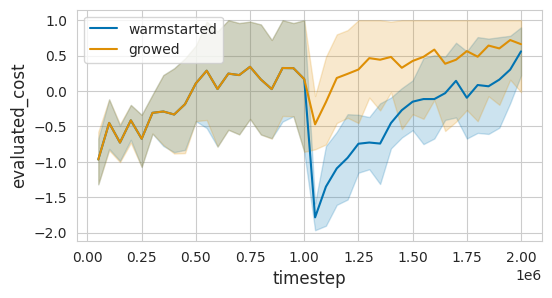

In [22]:
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost", label="warmstarted")
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost", label="growed")
